In [1]:
import seaborn as sns
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.ticker as mtick
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('dataframe.csv')
df = df[df.framework=='rn']

In [3]:
def get_count_where_relative_percentage(dataframe: pd.DataFrame, limit) -> pd.Series:
    all_frames = dataframe.groupby(['execution_id'])['frame_id'].count()
    filtered = dataframe[dataframe.white_relative_percentage > limit]
    filtered = filtered.groupby(['execution_id'])['frame_id'].count()
    return filtered / all_frames

In [4]:
table = [['Maior que', 'Média', 'Desvio padrão']]
for limit in [0, 50, 90, 99]:
    filtered_df = get_count_where_relative_percentage(df, limit)
    mean = np.round(filtered_df.mean()*100, 2)
    std = np.round(filtered_df.std()*100, 2)
    table.append([f'{limit}%', f'{mean}%', f'{std}%'])

print(tabulate(table))

---------  ------  -------------
Maior que  Média   Desvio padrão
0%         28.13%  5.19%
50%        20.52%  4.42%
90%        13.22%  4.15%
99%        11.87%  4.03%
---------  ------  -------------


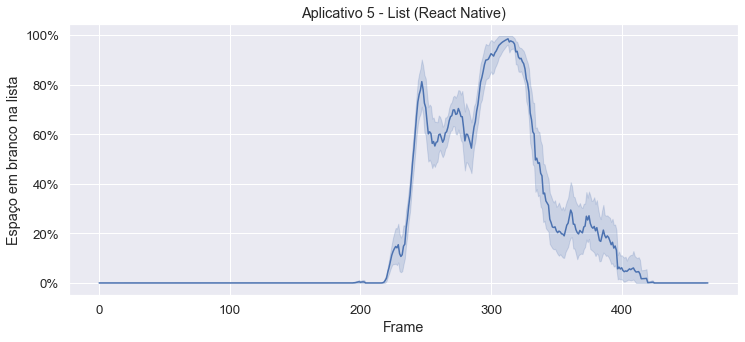

In [5]:
sns.set(
    rc = {'figure.figsize':(12,5)},
    font_scale = 1.2,
)
ax = sns.lineplot(data=df, x='frame_id', y='white_relative_percentage')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set(
    xlabel = 'Frame', 
    ylabel = 'Espaço em branco na lista',
    title = 'Aplicativo 5 - List (React Native)',
)
plt.savefig('rn_list_rec.png', bbox_inches='tight')